# Logistic Regression - Predicting Continous Response

In [2]:
import pandas as pd
import zipfile
with zipfile.ZipFile("glass.csv.zip", 'r') as z:
    f = z.open('glass.csv')
    glass = pd.read_csv(f, sep=',', index_col=0)
glass.head()

ri     na    mg    al     si     k     ca   ba    fe  glass_type
id                                                                        
22   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.0  0.00           1
185  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.0  0.00           6
40   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1
51   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.0  0.16           1

Pretend that we want to predict ri, and our only feature is al. How could we do it using machine learning?
We could frame it as a regression problem, and use a linear regression model with al as the only feature and ri as the response.
How would we visualize this model?
Create a scatter plot with al on the x-axis and ri on the y-axis, and draw the line of best fit.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


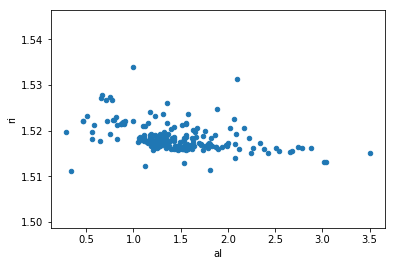

In [5]:
 #scatter plot using Pandas
glass.plot(kind='scatter', x="al", y='ri')

Text(0,0.5,'ri')

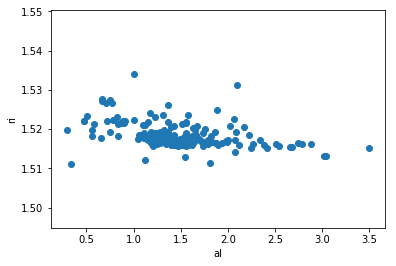

In [7]:
# equivalent scatter plot using Matplotlib
plt.scatter(glass.al,glass.ri)
plt.xlabel('al')
plt.ylabel('ri')

In [9]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# make predictions for all values of X
glass['ri_pred']=linreg.predict(X)
glass.head()

ri     na    mg    al     si     k     ca   ba    fe  glass_type  \
id                                                                           
22   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.0  0.00           1   
185  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.0  0.00           6   
40   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1   
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1   
51   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.0  0.16           1   

      ri_pred  
id             
22   1.521227  
185  1.521103  
40   1.520781  
39   1.520781  
51   1.520682

Text(0,0.5,'ri')

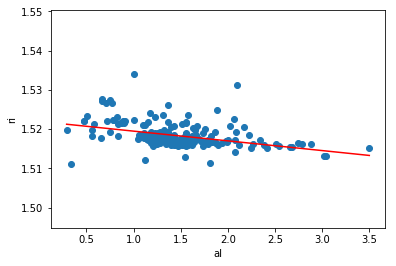

In [11]:
# put the plots together
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.ri_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri')

### Interpreting linear regression coefficients
Linear regression equation: $y = \beta_0 + \beta_1x$

In [12]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([ 1.51699012])

In [13]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 1.51699012])

In [14]:
# examine coefficient for al
print(feature_cols, linreg.coef_)

['al'] [-0.00247761]



Interpretation: A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [15]:

# increasing al by 1 (so that al=3) decreases ri by 0.0025
1.51699012 - 0.0024776063874696243

1.5145125136125304

In [16]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

array([ 1.51451251])

# Predicting a Categorical Response

In [17]:
# examine glass_type
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [18]:
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household']=glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

ri     na    mg    al     si     k     ca   ba    fe  glass_type  \
id                                                                           
22   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.0  0.00           1   
185  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.0  0.00           6   
40   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1   
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1   
51   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.0  0.16           1   

      ri_pred  household  
id                        
22   1.521227          0  
185  1.521103          1  
40   1.520781          0  
39   1.520781          0  
51   1.520682          0

Predict household using al. Let's visualize the relationship to figure out how to do this:

Text(0,0.5,'household')

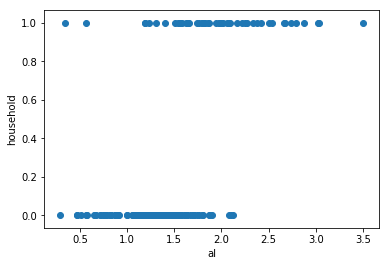

In [19]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

Let's draw a regression line, like we did before:

In [23]:
# fit a linear regression model and store the predictions
feature_cols=['al']
X=glass[feature_cols]
y=glass.household
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X)  

Text(0,0.5,'household')

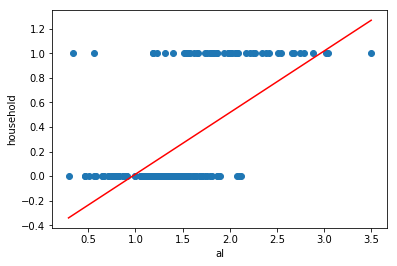

In [24]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [25]:
# understanding np.where
import numpy as np
nums=np.array([5,15,8])
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums>10,'big','small')

array(['small', 'big', 'small'],
      dtype='<U5')

In [27]:
# transform household_pred to 1 or 0
glass['household_pred_class']=np.where(glass.household_pred>=0.5,1,0)
glass.head()

ri     na    mg    al     si     k     ca   ba    fe  glass_type  \
id                                                                           
22   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.0  0.00           1   
185  1.51115  17.38  0.00  0.34  75.41  0.00   6.65  0.0  0.00           6   
40   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1   
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00           1   
51   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.0  0.16           1   

      ri_pred  household  household_pred  household_pred_class  
id                                                              
22   1.521227          0       -0.340495                     0  
185  1.521103          1       -0.315436                     0  
40   1.520781          0       -0.250283                     0  
39   1.520781          0       -0.250283                     0  
51   1.520682          0       -0.230236                     0

Text(0,0.5,'household')

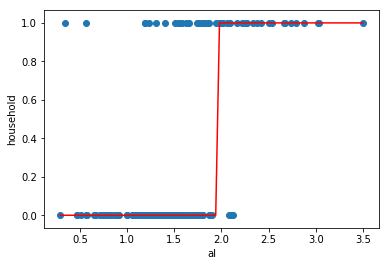

In [29]:
# plot the class predictions
plt.scatter(glass.al,glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

# Using Logistic Regression Instead

Logistic regression can do what we just did:

In [30]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C=1e9)
feature_cols=['al']
X=glass[feature_cols]
y=glass.household
logreg.fit(X,y)
glass['household_pred_class']=logreg.predict(X)


Text(0,0.5,'household')

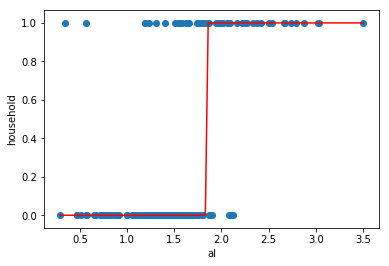

In [33]:
# plot the class predictions
plt.scatter(glass.al,glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [34]:
# examine some example predictions
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))

[[ 0.97161726  0.02838274]]
[[ 0.34361555  0.65638445]]
[[ 0.00794192  0.99205808]]


The first column indicates the predicted probability of class 0, and the second column indicates the predicted probability of class 1.

In [35]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table


probability      odds
0         0.10  0.111111
1         0.20  0.250000
2         0.25  0.333333
3         0.50  1.000000
4         0.60  1.500000
5         0.80  4.000000
6         0.90  9.000000

# Interpreting Logistic Regression Coefficients

Text(0,0.5,'household')

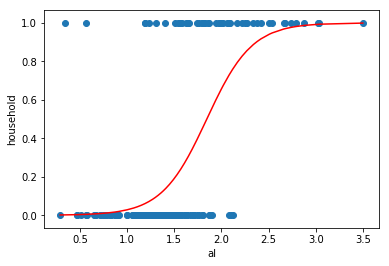

In [37]:
# plot the predicted probabilities again
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [38]:
# compute predicted log-odds for al=2 using the equation
logodds=logreg.intercept_ + logreg.coef_[0]*2
logodds

array([ 0.64722323])

In [39]:
# convert log-odds to odds
odds = np.exp(logodds)
odds


array([ 1.91022919])

In [40]:
# convert odds to probability
prob=odds/(1+odds)
prob

array([ 0.65638445])

In [43]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.65638445])

In [44]:
# examine the coefficient for al
feature_cols, logreg.coef_[0]

(['al'], array([ 4.18040386]))

 A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [47]:

# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [48]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.99205808])

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [49]:
# examine the intercept
logreg.intercept_

array([-7.71358449])

For an 'al' value of 0, the log-odds of 'household' is -7.71

In [50]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.00044652])